# Detailed comparison of a reference against longest/best isoform

This notebook was designed for human chr1.

In [53]:
import sys
sys.path.append("..")
import pannzer_out_api as poa
from matplotlib import pyplot
from matplotlib.backends.backend_pdf import PdfPages
import seaborn

Let's load files.

In [2]:
chr1_all_nrOFF = poa.parse_pannzer_annotation('../../data/pannzer_output/chr1.all.nr_off.out', 'all_nrOFF')
chr1_long_nrOFF = poa.parse_pannzer_annotation('../../data/pannzer_output/chr1.long.nr_off.out', 'long_nrOFF')

In [3]:
gene_set = [gene for gene in chr1_all_nrOFF.genes if len(chr1_all_nrOFF.get_gene(gene).transcripts) > 1]
gogo_dir = '~/Software/GOGO'

In [4]:
similarity = poa.gogo_similarity_between_annotation(chr1_all_nrOFF, chr1_long_nrOFF, gogo_dir, gene_set)

In [40]:
BP_sim = [ float(similarity[gene]['BP']) for gene in similarity if similarity[gene]['BP'] != 'NA']
CC_sim = [ float(similarity[gene]['CC']) for gene in similarity if similarity[gene]['CC'] != 'NA']
MF_sim = [ float(similarity[gene]['MF']) for gene in similarity if similarity[gene]['MF'] != 'NA']
binnumber = int(len(gene_set)/100)

15


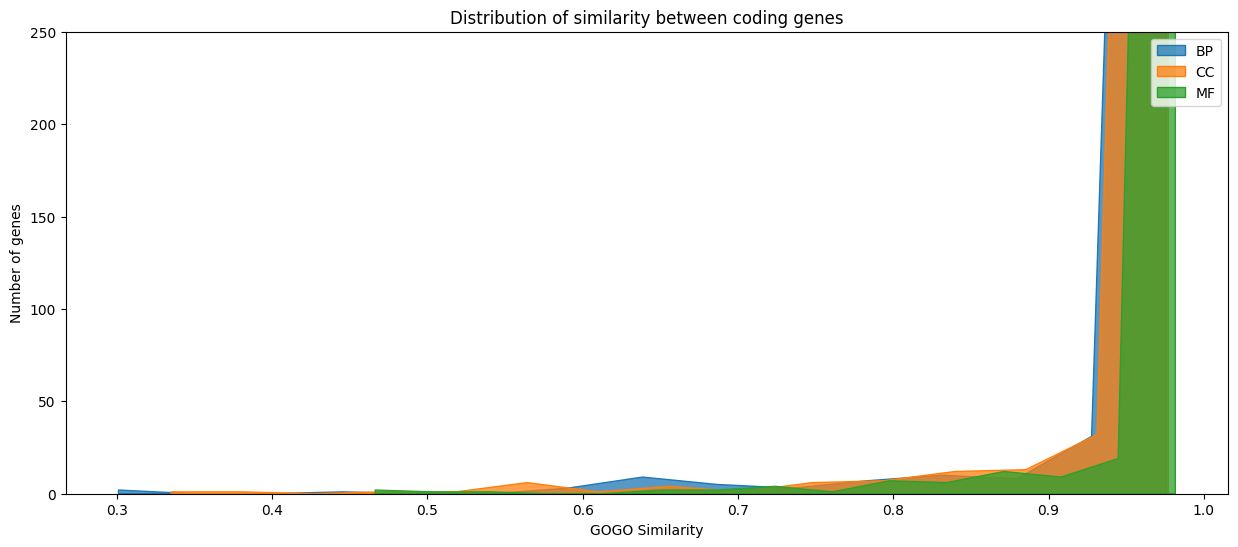

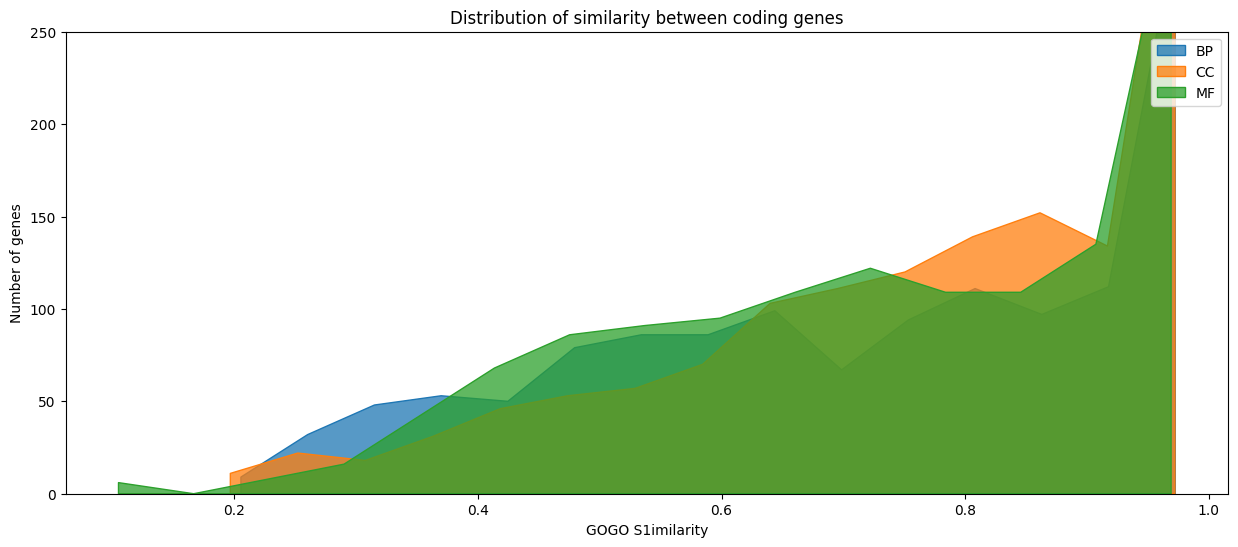

In [54]:
f1 = pyplot.figure(figsize=(15, 6))
seaborn.histplot(BP_sim, bins=binnumber,element='poly')
seaborn.histplot(CC_sim, bins=binnumber,element="poly")
seaborn.histplot(MF_sim, bins=binnumber,element="poly")
pyplot.legend(['BP', 'CC', 'MF'])
pyplot.title("Distribution of similarity between coding genes")
pyplot.xlabel("GOGO Similarity")
pyplot.ylabel("Number of genes")
pyplot.ylim(0,250)
pyplot.draw()
print(binnumber)
f2 = pyplot.figure(figsize=(15, 6))
seaborn.histplot(BP_sim3, bins=binnumber,element='poly')
seaborn.histplot(CC_sim3, bins=binnumber,element="poly")
seaborn.histplot(MF_sim3, bins=binnumber,element="poly")
pyplot.legend(['BP', 'CC', 'MF'])
pyplot.title("Distribution of similarity between coding genes")
pyplot.xlabel("GOGO S1imilarity")
pyplot.ylabel("Number of genes")
pyplot.ylim(0,250)
pyplot.draw()
figs = [f1, f2] # list of figures
with PdfPages('test.pdf') as pdf:
    for fig in figs:
        pdf.savefig(fig, bbox_inches='tight') 


In [7]:
rBP = [val for val in BP_sim if val < 1]
print(len(rBP), len(BP_sim))

135 1352


In [8]:
chr1_all_long = poa.make_longest_single_isoform_annotation(chr1_all_nrOFF)

In [9]:
similarity2 = poa.gogo_similarity_between_annotation(chr1_all_nrOFF, chr1_all_long, gogo_dir, gene_set)

In [19]:
BP_sim2 = [ float(similarity2[gene]['BP']) for gene in similarity2 if similarity2[gene]['BP'] != 'NA']
CC_sim2 = [ float(similarity2[gene]['CC']) for gene in similarity2 if similarity2[gene]['CC'] != 'NA']
MF_sim2 = [ float(similarity2[gene]['MF']) for gene in similarity2 if similarity2[gene]['MF'] != 'NA']

In [25]:
from statistics import mean

print(mean(BP_sim), mean(BP_sim2))

0.9880347633136095 0.9880347633136095


In [29]:
d=0
for gene in chr1_long_nrOFF.genes:
    transcript1 = list(chr1_long_nrOFF.genes[gene].transcripts.values())[0].id
    transcript2 = list(chr1_all_long.genes[gene].transcripts.values())[0].id
    if transcript1 != transcript2:
        d += 1
        print(transcript1,transcript2)
d

ENST00000420342.1 ENST00000290583.9


1

(0.0, 250.0)

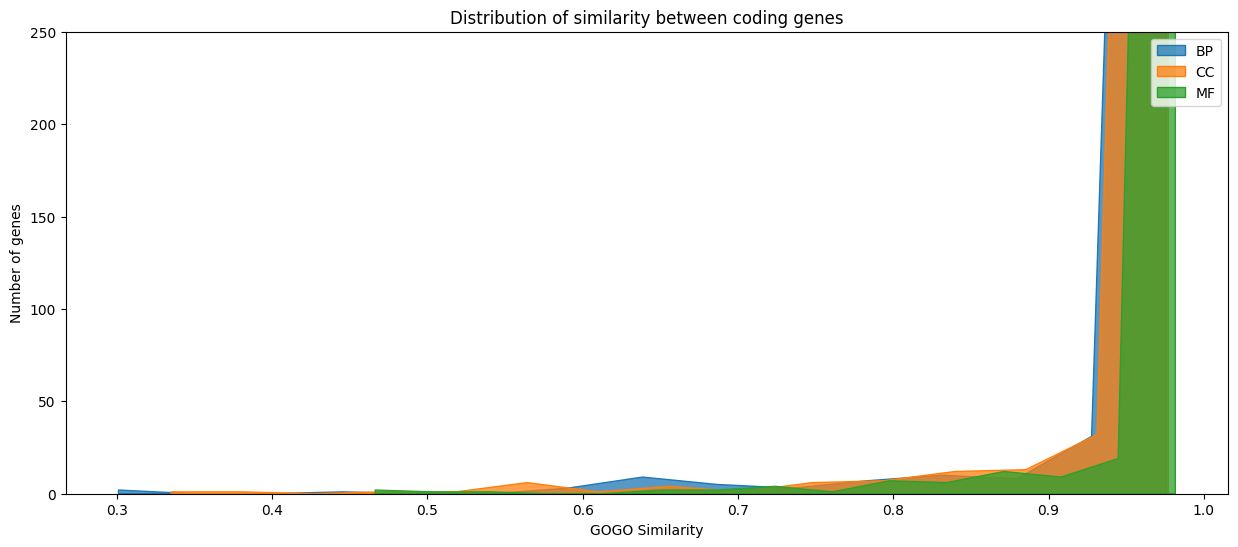

In [43]:
pyplot.figure(figsize=(15, 6))
seaborn.histplot(BP_sim2, bins=binnumber, element='poly')
seaborn.histplot(CC_sim2, bins=binnumber, element="poly")
seaborn.histplot(MF_sim2,  bins=binnumber,element="poly")
pyplot.legend(['BP', 'CC', 'MF'])
pyplot.title("Distribution of similarity between coding genes")
pyplot.xlabel("GOGO Similarity")
pyplot.ylabel("Number of genes")
pyplot.ylim(0,250)

In [11]:
chr1_all_shuffle = poa.make_suffle_copy(chr1_all_nrOFF)

In [12]:
chr1_long_shuffle = poa.make_longest_single_isoform_annotation(chr1_all_shuffle)

In [16]:
similarity3 = poa.gogo_similarity_between_annotation(chr1_all_shuffle, chr1_long_shuffle, gogo_dir, gene_set)

In [57]:
BP_sim3 = [ float(similarity3[gene]['BP']) for gene in similarity3 if similarity3[gene]['BP'] != 'NA']
CC_sim3 = [ float(similarity3[gene]['CC']) for gene in similarity3 if similarity3[gene]['CC'] != 'NA']
MF_sim3 = [ float(similarity3[gene]['MF']) for gene in similarity3 if similarity3[gene]['MF'] != 'NA']

(0.0, 250.0)

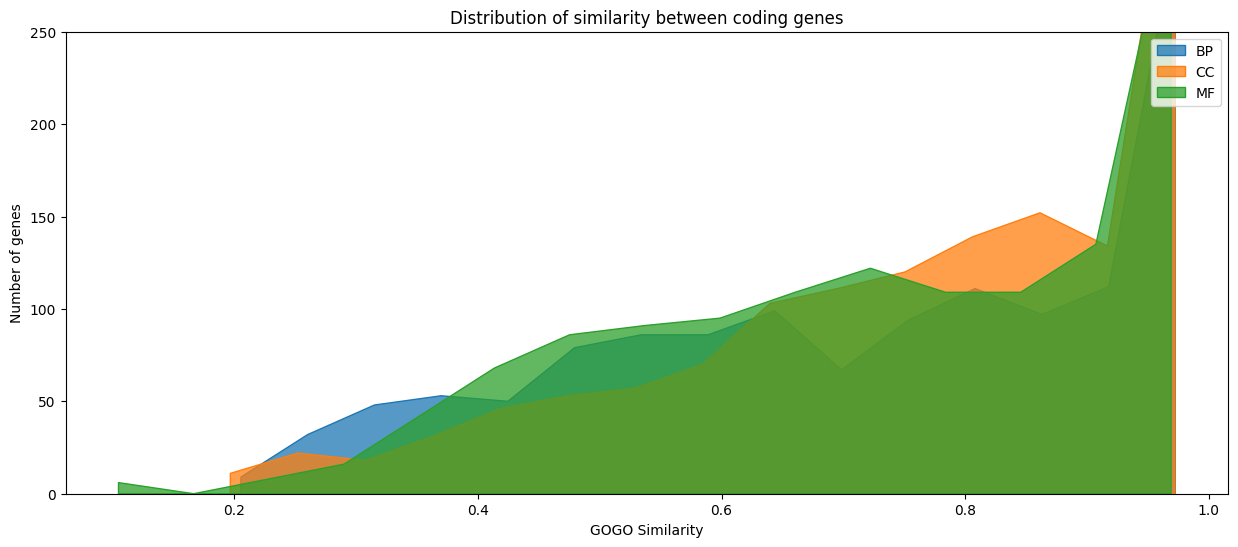

In [59]:
pyplot.figure(figsize=(15, 6))
seaborn.histplot(BP_sim3, bins=binnumber, element='poly')
seaborn.histplot(CC_sim3, bins=binnumber, element="poly")
seaborn.histplot(MF_sim3, bins=binnumber, element="poly")
pyplot.legend(['BP', 'CC', 'MF'])
pyplot.title("Distribution of similarity between coding genes")
pyplot.xlabel("GOGO Similarity")
pyplot.ylabel("Number of genes")
pyplot.ylim(0,250)

(0.0, 250.0)

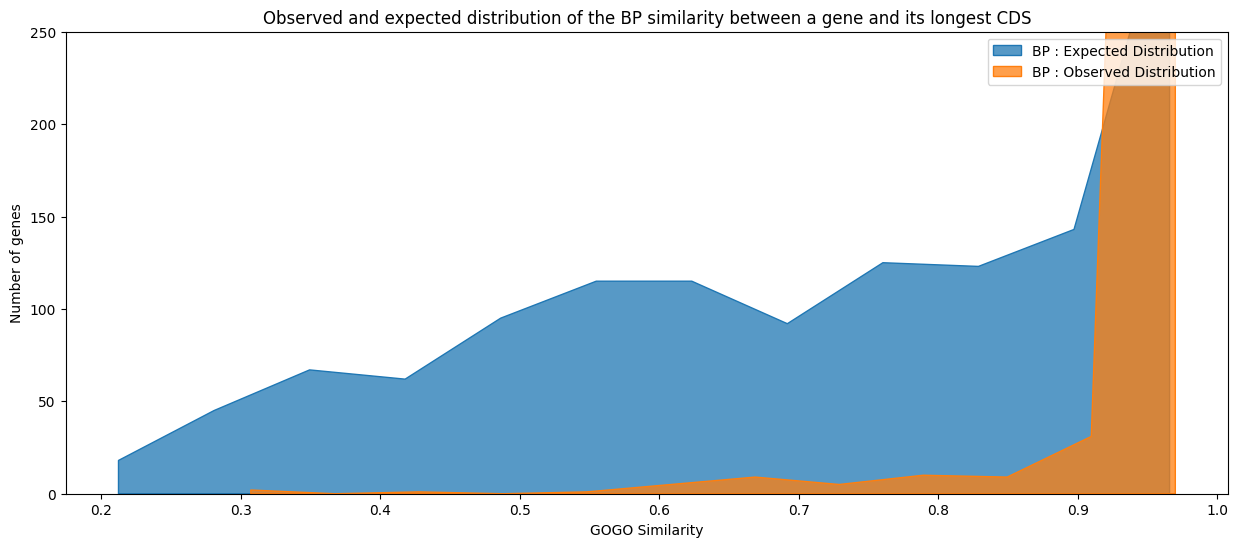

In [45]:
pyplot.figure(figsize=(15, 6))
seaborn.histplot(BP_sim3, element="poly")
seaborn.histplot(BP_sim, element='poly')
pyplot.legend(['BP : Expected Distribution', 'BP : Observed Distribution'])
pyplot.title("Observed and expected distribution of the BP similarity between a gene and its longest CDS")
pyplot.xlabel("GOGO Similarity")
pyplot.ylabel("Number of genes")
pyplot.ylim(0,250)

(0.0, 250.0)

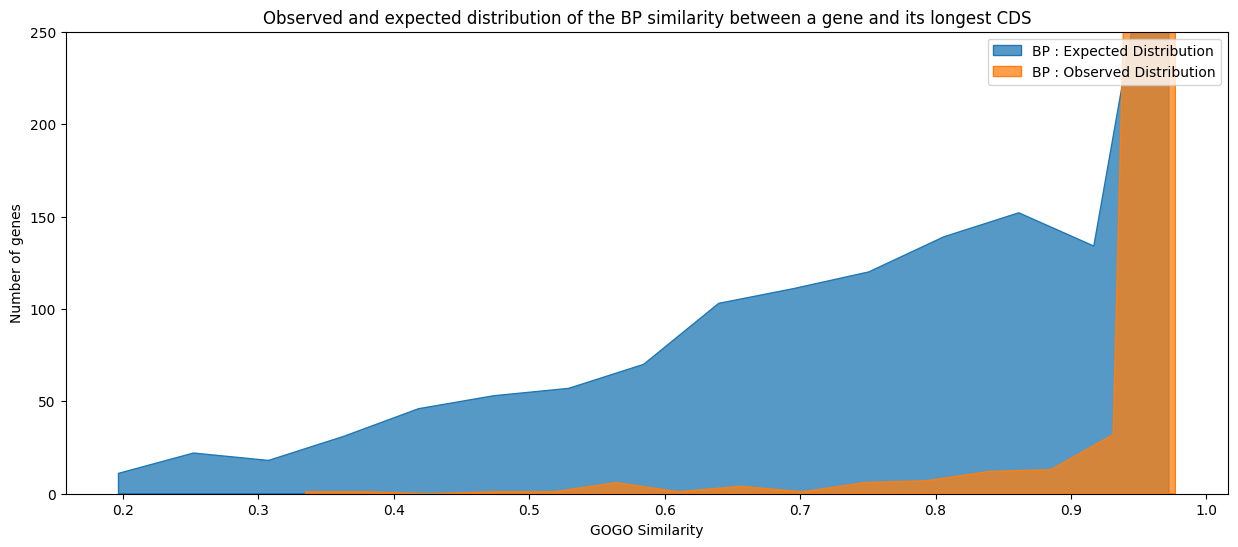

In [46]:
pyplot.figure(figsize=(15, 6))
seaborn.histplot(CC_sim3, bins=binnumber, element="poly")
seaborn.histplot(CC_sim, bins=binnumber, element='poly')
pyplot.legend(['BP : Expected Distribution', 'BP : Observed Distribution'])
pyplot.title("Observed and expected distribution of the BP similarity between a gene and its longest CDS")
pyplot.xlabel("GOGO Similarity")
pyplot.ylabel("Number of genes")
pyplot.ylim(0,250)

(0.0, 250.0)

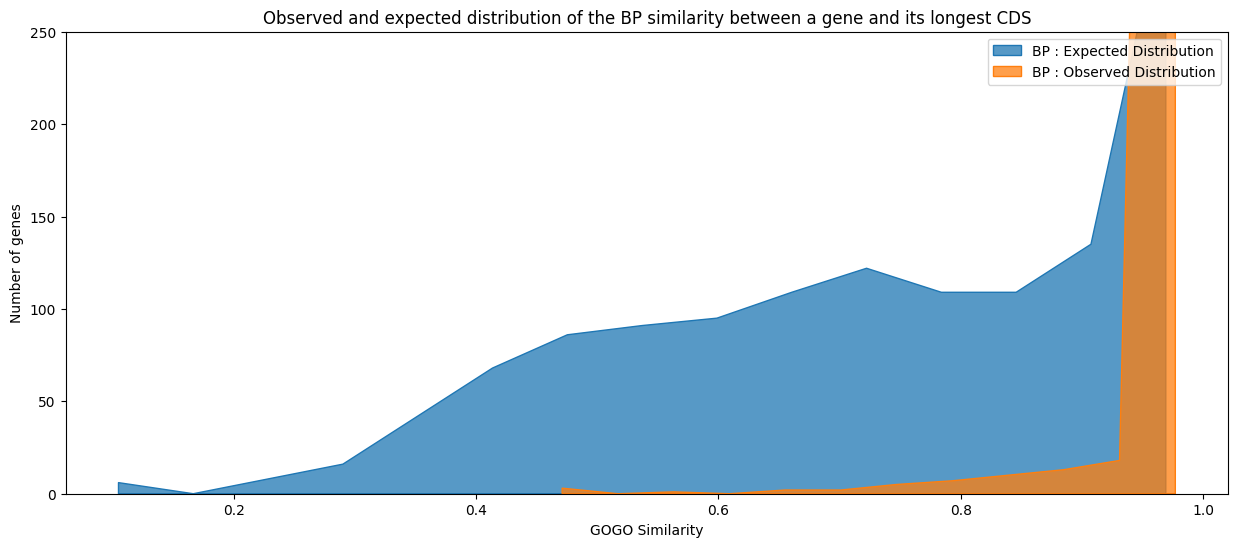

In [35]:
pyplot.figure(figsize=(15, 6))
seaborn.histplot(MF_sim3, element="poly")
seaborn.histplot(MF_sim, element='poly')
pyplot.legend(['BP : Expected Distribution', 'BP : Observed Distribution'])
pyplot.title("Observed and expected distribution of the BP similarity between a gene and its longest CDS")
pyplot.xlabel("GOGO Similarity")
pyplot.ylabel("Number of genes")
pyplot.ylim(0,250)

In [55]:
ax_similarity = []
ax_nb_isoform = []
for gene in gene_set:
    if similarity3[gene]['BP'] != 'NA':
        ax_similarity.append(float(similarity3[gene]['BP']))
        ax_nb_isoform.append(len(chr1_all_nrOFF.genes[gene].transcripts))

Text(0, 0.5, 'Number of isoforms')

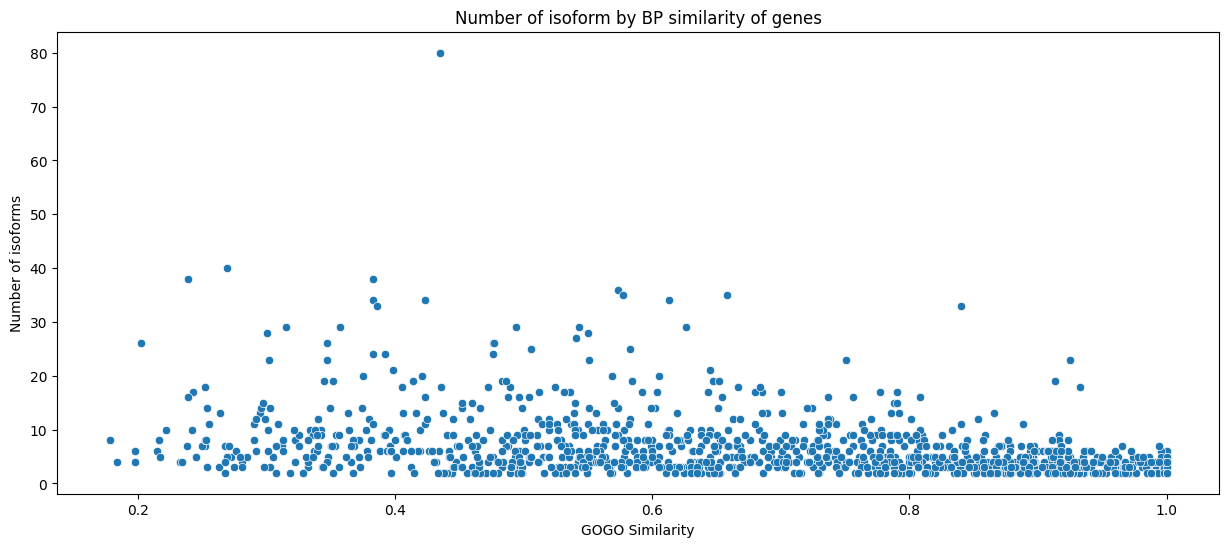

In [56]:
pyplot.figure(figsize=(15, 6))
seaborn.scatterplot(x = ax_similarity, y = ax_nb_isoform)
pyplot.title("Number of isoform by BP similarity of genes")
pyplot.xlabel("GOGO Similarity")
pyplot.ylabel("Number of isoforms")